In [4]:
import transformer
import models
import data
import matplotlib.pyplot as plt

In [11]:
model = transformer.getModel(models.TransformerConfig(
    n_tokens=len(data.chars2), 
    n_layers=2, 
    attention=models.MultiHeadAttentionConfig(n_heads=2, n_qkv=16, masked=True), 
    layer_norm=False,
    dropout=0.1,
    residual=False
))

print("\n\nBEFORE TRAINING\n\n")
seed = """LEWIS: What is't thou doing, fool? I thought we would feast this day?
KING GODDARD: """
print(transformer.generate(model, seed, 100))

losses = []
trainSet, testSet = data.load(0.8)



BEFORE TRAINING


n_pad: 0

LEWIS: What is't thou doing, fool? I thought we would feast this day?
KING GODDARD: ]-DZMYKdKWh8Qh!Ql(YfuD')h*L'p1s-3MK(UNTFUGo05h]';o
0X7LX5N
@y)wu9x.)9g1s'R4cP8HD.ufe)#2dGx:!s@pM#wsF


In [ ]:

losses += transformer.train(model, trainSet, testSet, 1000)



AFTER TRAINING


n_pad: 0

LEWIS: What is't thou doing, fool? I thought we would feast this day?
KING GODDARD:   'wind I bis thrint o baded bemud fnayor ind II manty you ry bleas;
    the, afiked; of heargaiess 


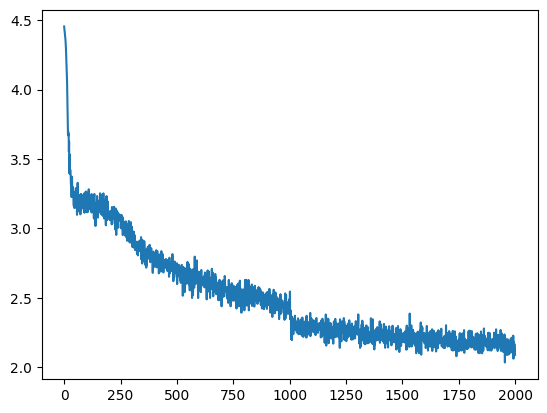

In [10]:
print("\n\nAFTER TRAINING\n\n")
print(transformer.generate(model, seed, 100))

plt.plot(losses)

Test Loss: 4.4741339683532715
Batch 0 Loss: 4.471970081329346
Test Loss: 4.4605512619018555
Batch 100 Loss: 3.250641107559204
Test Loss: 3.3249692916870117
Batch 200 Loss: 3.2290074825286865
Test Loss: 3.1476197242736816
Batch 300 Loss: 3.151637315750122
Test Loss: 3.2462453842163086
Batch 400 Loss: 3.0896170139312744
Test Loss: 3.1767728328704834
Batch 500 Loss: 3.082770586013794
Test Loss: 3.1396307945251465
Batch 600 Loss: 3.0966720581054688
Test Loss: 3.1600704193115234
Batch 700 Loss: 3.049318790435791
Test Loss: 3.1240482330322266
Batch 800 Loss: 3.0790176391601562
Test Loss: 3.1379706859588623
Batch 900 Loss: 3.1566085815429688
Test Loss: 3.08620023727417


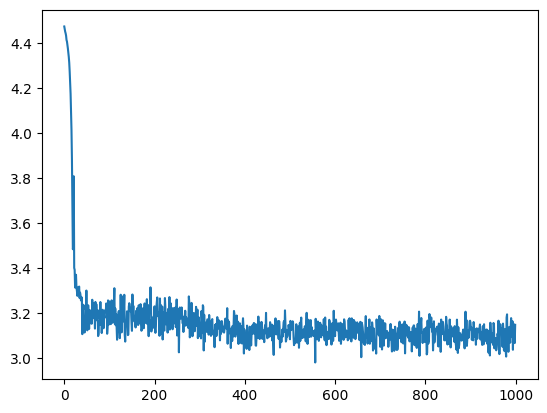

In [14]:
model = transformer.getModel(models.TransformerConfig(
    n_tokens=len(data.chars2), 
    n_layers=6, 
    attention=models.MultiHeadAttentionConfig(n_heads=2, n_qkv=16, masked=True), 
    layer_norm=False,
    dropout=0.1,
    residual=False
))
losses = []
trainSet, testSet = data.load(0.8)
losses += transformer.train(model, trainSet, testSet, 1000)
plt.plot(losses)

In [ ]:
model = transformer.getModel(models.TransformerConfig(
    n_tokens=len(data.chars2), 
    n_layers=6, 
    attention=models.MultiHeadAttentionConfig(n_heads=2, n_qkv=16, masked=True), 
    layer_norm=True,
    dropout=0.1,
    residual=False
))
losses = []
trainSet, testSet = data.load(0.8)
losses += transformer.train(model, trainSet, testSet, 1000)
plt.plot(losses)

In [ ]:
model = transformer.getModel(models.TransformerConfig(
    n_tokens=len(data.chars2), 
    n_layers=6, 
    attention=models.MultiHeadAttentionConfig(n_heads=2, n_qkv=16, masked=True), 
    layer_norm=False,
    dropout=0.1,
    residual=True
))
losses = []
trainSet, testSet = data.load(0.8)
losses += transformer.train(model, trainSet, testSet, 1000)
plt.plot(losses)

In [ ]:
model = transformer.getModel(models.TransformerConfig(
    n_tokens=len(data.chars2), 
    n_layers=6, 
    attention=models.MultiHeadAttentionConfig(n_heads=2, n_qkv=16, masked=True), 
    layer_norm=True,
    dropout=0.1,
    residual=True
))
losses = []
trainSet, testSet = data.load(0.8)
losses += transformer.train(model, trainSet, testSet, 1000)
plt.plot(losses)